# A/B Tests

A/B tests play a vital role in many scenarios where two approaches need to be compared, for example, if a new approach or technique is working better than the current status quo. A common example are web-pages where the design and user experience have a significant impact on how users interact with the webpage. A good webpage might for example increase the "conversion rate" at which potential customers complete a purchase or the "click-through-rate", i.e. the ratio of how often a visitor clicks on an advertisement compared to the the number of "impressions" (i.e. "displays") of that advertisement.
Other use-cases could include to test a new design of a webpage, e.g. if the placement of elements such as buttons, shopping carts, etc. are better than the current approach, etc.

### Example

An e-commerce owner wants to improve the improve the advertisement for the webshop and starts a new ad-campaign with a marketing agency. To prove that the new campain works the owner of the webshop suggests an A/B Test comparing the current ads on the web with the new one. Each ad gets shown to potential customers ("impressions") who then either click on the ad to get to the webshop ("conversion") - or not. The rate of impressions and conversions for both approaches is monitored for a few weeks to decide whether the new ad campaign is better than the old one.

For example, after 6 weeks we could have:
 *   Current Campaign: 15700 impressions, 30 conversions
 *   New Campaign: 16000 impressions, 50 conversions
 
Is the new campaign better?
We can calculate the *uplift* based on the conversion rate, i.e. the ratio of conversions over impressions:
$$ u = \frac{CR_{new} - CR_{current}}{CR_{current}}$$

In this example: $CR_{new} = 50/16000 = 0.003125$ and $CR_{current} = 30/15700 = 0.0019$ leading to $u = \frac{0.003125-0.0019}{0.0019} = 0.63$.

The new approach seems to work - but how trustworthy is the result?
To understand A/B tests more thoroughly one has to dig a little deeper into statistics...


## Bernoulli and Binomial Trial

In many cases the A/B tests seek to improve on a given status quo in a situation with two potential outcomes: "success" or "failure", "yes" or "no", etc.
In the case of an advertisement on the web this would be: "The visitor clicked on the ad" ("yes" or "success") vs "The visitor did not click on the ad ("no" or "failure) or tossing a coin and obtaining "head" or "tail".

These kind of scenarios are called "Bernoulli trials" and represent a random experiment with only two different outcomes. Closely related are the "binomial trials" which are essentially a fixed number $n$ of statistically independent Bernoulli trials, e.g. repeatedly tossing the coin $n$ times.

The probability of observing $k$ successes in a Binomial trial is given by the binomial distribution:
$$ P(k) = {{n}\choose{k}} p^k q^{n-k}$$

where $p$ is the probability of a true result and $q=1-p$ is the probability of a false result.

In [87]:
# imports
%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 10
%matplotlib inline


import matplotlib.pyplot as plt
#plotting in 3D
from mpl_toolkits import mplot3d

#interactive plots
from ipywidgets import interactive

import numpy as np
from scipy.stats import beta
from math import lgamma

#speeding up
from numba import jit

Populating the interactive namespace from numpy and matplotlib


## Beta distribution

The Beta distribution is a continuous probability density distribution in the interval [0,1] which is parametrized by two positive shape parameters $\alpha$ and $\beta$. One of its important properties is that the Beta distribution in the *conjugate prior* probability distribution in the framework of Bayesian statistics for the Bernoulli, binomial, negative-binomial and geometric distribution. This has the advantage that the Beta distribution can be used to model any prior knowledge for Bernoulli or Binomial trials.

The Beta distribution has two parameters $\alpha$ and $\beta$. When used for the description of Bernoulli trials, $\alpha$ represents the number of successes and $\beta$ the number of failures.
For example, if in $n$ trials the experiment gave 4 successes, then $\alpha = 4$ and $\beta = 6$

### Exercise illustrate the Beta distribution

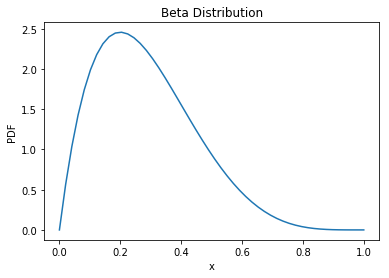

In [3]:
a = 2
b  = 5
x_space = np.linspace(0.0, 1.0)
plt.plot(x_space, beta.pdf(x_space, a, b))
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Beta Distribution")
plt.show()

Interactive version 
(works in Jupyter notebook but not Lab?)

In [4]:
def f(a, b):
    plt.figure(2)
    x = np.linspace(0.0, 1.0, num=100)
    plt.plot(x_space, beta.pdf(x_space, a, b))
    plt.xlabel("x")
    plt.ylabel("PDF")
    plt.title("Beta Distribution")
    plt.show()

interactive(f, a=(0.1, 10), b=(0.1,10))


interactive(children=(FloatSlider(value=5.05, description='a', max=10.0, min=0.1), FloatSlider(value=5.05, des…

A special point in the parameter space of the beta function is $\alpha = 1$ and $\beta =1$, which is a flat (uniform) distribution. In terms of Bayesian statistics we can use this special set to model an uninformative prior, i.e. if we don't know anything about the experiment we assume all outcomes are equally likely. Note that this is not always a valid assumption.

In this case we model the prior of the Bernoulli trial *on top* of this flat (uninformative) prior hence:
$\alpha =  1 + $ number of successes  and $\beta = 1 +$ number of failures. Before the experiment starts, we don't know anything about the outcomes and start with a flat prior. The more data are added, the more distinct the distribution becomes.


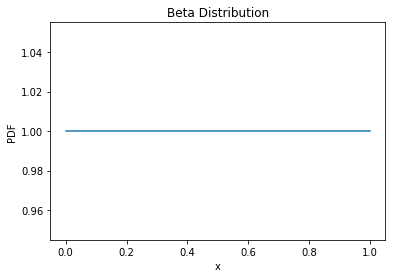

In [8]:
a = 1
b  = 1
x_space = np.linspace(0.0, 1.0)
plt.plot(x_space, beta.pdf(x_space, a, b))
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Beta Distribution")
plt.show()

In the case of the example on the top:
 *   Current Campaign: 15700 impressions, 30 conversions, i.e. 30 "successes" and 15700-30 "failures" 
 *   New Campaign: 16000 impressions, 50 conversions, i.e. 50 "successes" and 16000-50 "failures"
this would lead to:

current campaign: $\alpha_c = 1 + 30$ and $\beta_c = 1+ 15700-30$
new campaign $\alpha_n = 1 + 50$ and $\beta_n = 1+ 16000-50$



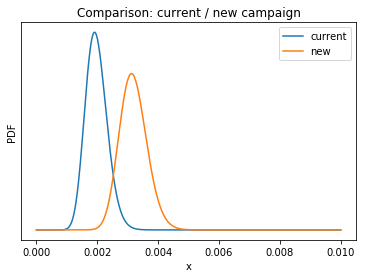

In [53]:
a_c = 1+30
b_c = 1+15700-30

a_n = 1+50
b_n = 1+16000-50

x_space = np.linspace(0.0, 0.01, num=500)
plt.plot(x_space, beta.pdf(x_space, a_c, b_c), label='current')
plt.plot(x_space, beta.pdf(x_space, a_n, b_n), label='new')
plt.xlabel("x")
plt.ylabel("PDF")
plt.yticks([])
plt.title("Comparison: current / new campaign")
plt.legend()
plt.show()

The two experiments (current campaign vs new campaign) are now represented as two probability density distributions, one for each experiment. The joint probability density distribution of the two beta distributions of the new and current approach can be visualized like this:

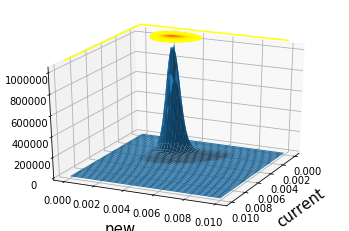

In [84]:
def f(x, y):
    return beta.pdf(x, a_c, b_c)*beta.pdf(y, a_n, b_n)

X, Y = np.meshgrid(x_space, x_space)
Z = f(X, Y)

ax = plt.subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(elev=25, azim=25)
ax.set_xlabel('current', fontsize=15, labelpad=10)
ax.set_ylabel('new', fontsize=15, labelpad=10)
ax.contour(X, Y, Z, 1000,  cmap="autumn_r",  offset=1100000)


Or as a 2D representation as a contour plot:

Text(0, 0.5, 'new')

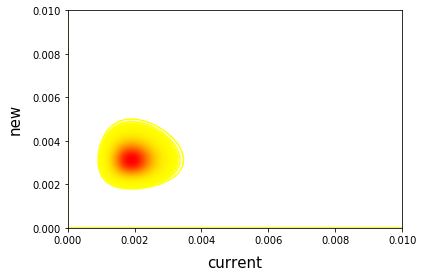

In [86]:
ax = plt.subplot()
ax.contour(X, Y, Z, 1000,  cmap="autumn_r")
ax.set_xlabel('current', fontsize=15, labelpad=10)
ax.set_ylabel('new', fontsize=15, labelpad=10)


In order to evaluate the A/B test, one needs to determine whether the new method is more successful than the current one, i.e. the probability of the new method is greater than the one of the current method. In general, this has to be evaluated numerically, however, for the special case of beta distributions the following function $g(a,b,c,d)$ represents the probability that a sample taken from a beta function with parameters a and b is larger than an independent sample taken from a beta function with parameters c and d, where all parameters a,b,c,d are positive (see: [J Cook: Exact Calculation of Beta Inequalities](https://www.johndcook.com/UTMDABTR-005-05.pdf) )

$$
g(a,b,c,d) = \int_0^1 \frac{x^{a-1}(1-x)^{b-1}} {B(a,b)}I_x(c,d)dx
$$
where $I_x(c,d)$ is the incomplete beta function.

For the special case $d=1$:
$$
g(a,b,c,1) = \frac{\Gamma(a+b)\Gamma(a+c)}{\Gamma(a+b+c)\Gamma(a)}
$$
and it can be shown that all cases where d is a positive integer can be reduced to this case.

This means that for the special case of beta functions no numerical integration is needed and the results can be obtained via the above formulae.

In [107]:
#implementation taken from: https://gist.github.com/arsatiki/1395348/f0275f529d322d3c23e18201f26890f5a09dcb51

@jit
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)

    return np.exp(num - den)

@jit
def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d
        
def g(a, b, c, d):
    return g0(a, b, c) + sum( hiter(a, b, c, d)) 

Evaluating the results of the example, we calculate the function $g$ that the new approach is better than the current one:

In [109]:
prob = g(a_n,b_n,
         a_c,b_c)
print('Probability that the first sample is larger than the second: p= %.2lf' % prob)

Probability that the first sample is larger than the second: p= 0.98


/home/kerzel/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
